<a href="https://colab.research.google.com/github/2series/test/blob/main/21_11_220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_id = '12nRGXBL6u38sCET_x1OmLW6Hlthob-e_' # app_data_final.csv
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# The shareable link
link = 'https://drive.google.com/open?id=12nRGXBL6u38sCET_x1OmLW6Hlthob-e_'

In [ ]:
# Verify everything after '='
fluff, id = link.split('=')
print (id) 

12nRGXBL6u38sCET_x1OmLW6Hlthob-e_


In [ ]:
# Libraries are imported at the start of nb
!pip install scikit-plot

In [ ]:
# Import libraries and prepare the data
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
# To ignore deprecation warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
pd.set_option('display.max_columns', 75)


from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import svm
plt.style.use('ggplot')

In [ ]:
# Stored dataset in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('app_data_final.csv')  
df = pd.read_csv('app_data_final.csv')
df.head()


# Summarize first few rows
#print(df.head())

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_PHONE  FLAG_EMAIL  \
0                    0.018801          NaN           1           0   
1                    0.003541          NaN           1           0   
2                    0.010032         26.0           1           0   
3                    0.008019          NaN           0           0   
4                    0.028663          NaN           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  EXT_SOURCE_1  \
0                       10  Business Entity Type 3      0.083037   
1                       11                  School      0.311267   
2                        9              Government           NaN   
3                       17  Business Entity Type 3           NaN   
4                       11                Religion           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0      0.262949      0.139376                         0.0   
1      0.622246           NaN                         0.0   
2      0.555912      0.729567                         0.0   
3      0.650442           NaN                         NaN   
4      0.322738           NaN                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                  

In [ ]:
df.shape

(307511, 34)

In [ ]:
# Change behaviour globaly
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df.columns.unique()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [ ]:
df.describe()

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count  307511.000 307511.000    307511.000        307511.000  307511.000   
mean   278180.519      0.081         0.417        168797.919  599026.000   
std    102790.175      0.272         0.722        237123.146  402490.777   
min    100002.000      0.000         0.000         25650.000   45000.000   
25%    189145.500      0.000         0.000        112500.000  270000.000   
50%    278202.000      0.000         0.000        147150.000  513531.000   
75%    367142.500      0.000         1.000        202500.000  808650.000   
max    456255.000      1.000        19.000     117000000.000 4050000.000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  OWN_CAR_AGE  \
count   307499.000       307233.000                  307511.000   104582.000   
mean     27108.574       538396.207                       0.021       12.061   
std      14493.737       369446.461                       0.014       11.945   
min       1615.500        40500.000                       0.000        0.000   
25%      16524.000       238500.000                       0.010        5.000   
50%      24903.000       450000.000                       0.019        9.000   
75%      34596.000       679500.000                       0.029       15.000   
max     258025.500      4050000.000                       0.073       91.000   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000  307511.000       307509.000            307511.000   
mean        0.281       0.057            2.153                 2.052   
std         0.450       0.231            0.911                 0.509   
min         0.000       0.000            1.000                 1.000   
25%         0.000       0.000            2.000                 2.000   
50%         0.000       0.000            2.000                 2.000   
75%         1.000       0.000            3.000                 2.000   
max         1.000       1.000           20.000                 3.000   

       HOUR_APPR_PROCESS_START  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
count               307511.000    134133.000    306851.000    246546.000   
mean                    12.063         0.502         0.514         0.511   
std                      3.266         0.211         0.191         0.195   
min                      0.000         0.015         0.000         0.001   
25%                     10.000         0.334         0.392         0.371   
50%                     12.000         0.506         0.566         0.535   
75%                     14.000         0.675         0.664         0.669   
max                     23.000         0.963         0.855         0.896   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                  265992.000                 265992.000   
mean                        0.006                      0.007   
std                         0.084                      0.111   
min                         0.000                      0.000   
25%                         0.000                      0.000   
50%                         0.000                      0.000   
75%                         0.000                      0.000   
max                         4.000                      9.000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                  265992.000                 265992.000   
mean                        0.034                      0.267   
std                         0.205                      0.916   
min                         0.000                      0.000   
25%                         0.000                      0.000   
50%                         0.000                      0.000   
75%                         0.000                      0.000   
max                         8.000                     27.000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count                 265992.000                  

In [ ]:
# Preview data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

# Data Cleaning

In [ ]:
# Preview NaN
df.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
NAME_TYPE_SUITE                True
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
REGION_POPULATION_RELATIVE    False
OWN_CAR_AGE                    True
FLAG_PHONE                    False
FLAG_EMAIL                    False
OCCUPATION_TYPE                True
CNT_FAM_MEMBERS                True
REGION_RATING_CLIENT          False
HOUR_APPR_PROCESS_START       False
ORGANIZATION_TYPE             False
EXT_SOURCE_1                   True
EXT_SOURCE_2                   True
EXT_SOURCE_3                

In [ ]:
# Quantify number of NaN
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
OWN_CAR_AGE                   202929
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
E

In [ ]:
# Preview percentage of null values in each column
missing_val = ((df.isna().sum()) / len(df.index)).sort_values(ascending=False)
missing_val = missing_val[missing_val > 0]
print(missing_val * 100)

OWN_CAR_AGE                  65.991
EXT_SOURCE_1                 56.381
OCCUPATION_TYPE              31.346
EXT_SOURCE_3                 19.825
AMT_REQ_CREDIT_BUREAU_YEAR   13.502
AMT_REQ_CREDIT_BUREAU_MON    13.502
AMT_REQ_CREDIT_BUREAU_WEEK   13.502
AMT_REQ_CREDIT_BUREAU_DAY    13.502
AMT_REQ_CREDIT_BUREAU_HOUR   13.502
AMT_REQ_CREDIT_BUREAU_QRT    13.502
NAME_TYPE_SUITE               0.420
EXT_SOURCE_2                  0.215
AMT_GOODS_PRICE               0.090
AMT_ANNUITY                   0.004
CNT_FAM_MEMBERS               0.001
dtype: float64


In [ ]:
# Drop columns where NaN is > 30%
df.drop(missing_val[missing_val > 0.3].index, axis=1, inplace=True)

In [ ]:
# Drop rows where NaN is > 30
df.dropna(axis=0, thresh=30, inplace=True)

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [ ]:
df.shape

(265579, 31)

In [ ]:
# Quantify number of NaN
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      11
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                 868
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
HOUR_APPR_PROCESS_START           0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    430
EXT_SOURCE_3                  19243
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK  

# Impute NaN Values

In [ ]:
# numeric columns
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [ ]:
# Preview unique values
unique_val = df.apply(lambda x: len(pd.unique(x)), axis=0).sort_values(ascending=False)
unique_val

SK_ID_CURR                    265579
EXT_SOURCE_2                  111938
AMT_ANNUITY                    13193
AMT_CREDIT                      5265
AMT_INCOME_TOTAL                2182
AMT_GOODS_PRICE                  840
EXT_SOURCE_3                     815
REGION_POPULATION_RELATIVE        81
ORGANIZATION_TYPE                 58
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
CNT_FAM_MEMBERS                   17
CNT_CHILDREN                      15
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
NAME_INCOME_TYPE                   8
NAME_TYPE_SUITE                    8
NAME_HOUSING_TYPE                  6
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
CODE_GENDER                        3
REGION_RATING_CLIENT               3
FLAG_PHONE                         2
FLAG_EMAIL                         2
F

In [ ]:
# Lets sample the count for variables having unique values
def column_analyse(x, df=df): 
    print(df[x].value_counts(), '\n', df[x].value_counts()/len(df[x]))

column_analyse('TARGET') 
column_analyse('NAME_CONTRACT_TYPE')
column_analyse('FLAG_EMAIL')

0    245070
1     20509
Name: TARGET, dtype: int64 
 0   0.923
1   0.077
Name: TARGET, dtype: float64
Cash loans         240825
Revolving loans     24754
Name: NAME_CONTRACT_TYPE, dtype: int64 
 Cash loans        0.907
Revolving loans   0.093
Name: NAME_CONTRACT_TYPE, dtype: float64
0    250240
1     15339
Name: FLAG_EMAIL, dtype: int64 
 0   0.942
1   0.058
Name: FLAG_EMAIL, dtype: float64


### Observation

* We will remove SK_ID_CURR as it is 100% unique
* TARGET, NAME_CONTRACT_TYPE and FLAG_EMAIL are highly imbalanced, more than 90%
* AMT_GOODS_PRICE is highly correlated with AMT_CREDIT
* ORGANIZATION_TYPE has a high cardinality: 58 distinct values
* EXT_SOURCE_2, EXT_SOURCE_3 are too detailed for analysis
* AMT_REQ_CREDIT_BUREAU are correlated with loan application



In [ ]:
delete_cols = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_EMAIL', 'FLAG_PHONE',
               'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 
               'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'ORGANIZATION_TYPE',
               'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
               'AMT_REQ_CREDIT_BUREAU_YEAR']

df.drop(delete_cols, axis=1, inplace=True)

In [ ]:
df.shape

(265579, 16)

In [ ]:
df.columns

Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT'],
      dtype='object')

In [ ]:
# NAME_TYPE_SUITE is an unsupported type, convert series to object
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].astype(str)

# REGION_RATING_CLIENT convert to string so as to encode variable as ordinal
df['REGION_RATING_CLIENT'] = df['REGION_RATING_CLIENT'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265579 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      265579 non-null  int64  
 1   CODE_GENDER                 265579 non-null  object 
 2   FLAG_OWN_CAR                265579 non-null  object 
 3   FLAG_OWN_REALTY             265579 non-null  object 
 4   CNT_CHILDREN                265579 non-null  int64  
 5   AMT_INCOME_TOTAL            265579 non-null  float64
 6   AMT_CREDIT                  265579 non-null  float64
 7   AMT_ANNUITY                 265579 non-null  float64
 8   NAME_TYPE_SUITE             265579 non-null  object 
 9   NAME_INCOME_TYPE            265579 non-null  object 
 10  NAME_EDUCATION_TYPE         265579 non-null  object 
 11  NAME_FAMILY_STATUS          265579 non-null  object 
 12  NAME_HOUSING_TYPE           265579 non-null  object 
 13  REGION_POPULAT

# Pycaret Exploration

In [ ]:
!pip install pycaret

In [ ]:
# Check pycaret version
import pycaret
print('PyCaret: %s' % pycaret.__version__)

PyCaret: 2.2.0


In [ ]:
from pycaret.classification import *

In [ ]:
# Initialize training environment and create the transformation pipeline
exp_clf = setup(data=df, target='TARGET',
            session_id=123,
            remove_outliers=True,
            normalize=True,
            outliers_threshold=0.2,
            normalize_method='robust',
            transformation=True,
            transformation_method='quantile',
            categorical_features=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                            'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                            'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT'],
            numeric_features=['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                              'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS'],
            bin_numeric_features=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                                  'REGION_POPULATION_RELATIVE'],
            ignore_low_variance=True,
            combine_rare_levels=True,
            rare_level_threshold=0.05,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.90,
            feature_selection=True,
            fix_imbalance=True,
            profile=True)

In [ ]:
# Report the best models based on roc auc metric
top3_models = compare_models(n_select=3, sort='AUC', round=3)
print(top3_models)

Model  Accuracy   AUC  Recall  Prec.  \
lightgbm  Light Gradient Boosting Machine     0.921 0.623   0.000  0.000   
lr                    Logistic Regression     0.591 0.622   0.581  0.109   
lda          Linear Discriminant Analysis     0.589 0.622   0.582  0.108   
xgboost         Extreme Gradient Boosting     0.921 0.621   0.000  0.150   
catboost              CatBoost Classifier     0.921 0.618   0.000  0.117   
gbc          Gradient Boosting Classifier     0.911 0.609   0.039  0.188   
ada                  Ada Boost Classifier     0.821 0.608   0.226  0.132   
nb                            Naive Bayes     0.442 0.576   0.664  0.090   
rf               Random Forest Classifier     0.910 0.566   0.022  0.118   
et                 Extra Trees Classifier     0.908 0.555   0.026  0.122   
knn                K Neighbors Classifier     0.650 0.541   0.388  0.092   
dt               Decision Tree Classifier     0.855 0.515   0.108  0.103   
qda       Quadratic Discriminant Analysis     0.079 0.500   1.000  0.079   
svm                   SVM - Linear Kernel     0.608 0.000   0.557  0.111   
ridge                    Ridge Classifier     0.589 0.000   0.582  0.108   

            F1  Kappa   MCC  TT (Sec)  
lightgbm 0.000  0.000 0.000    12.093  
lr       0.183  0.058 0.094    15.898  
lda      0.183  0.057 0.094    11.705  
xgboost  0.000  0.000 0.004    80.122  
catboost 0.001 -0.000 0.001   153.156  
gbc      0.064  0.038 0.051    75.857  
ada      0.166  0.074 0.078    21.893  
nb       0.158  0.022 0.048     7.241  
rf       0.037  0.013 0.018    59.514  
et       0.043  0.015 0.021    95.620  
knn      0.149  0.024 0.034   648.090  
dt       0.105  0.026 0.026    10.206  
qda      0.146  0.000 0.001     9.225  
svm      0.184  0.060 0.094     9.090  
ridge    0.183  0.057 0.094     7.023

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)]


In [ ]:
# Create model
lightgbm = create_model('lightgbm', round=3)

Accuracy   AUC  Recall  Prec.    F1  Kappa   MCC
0        0.921 0.621   0.000  0.000 0.000  0.000 0.000
1        0.921 0.626   0.000  0.000 0.000  0.000 0.000
2        0.921 0.625   0.000  0.000 0.000  0.000 0.000
3        0.921 0.635   0.000  0.000 0.000  0.000 0.000
4        0.921 0.610   0.000  0.000 0.000  0.000 0.000
5        0.921 0.612   0.000  0.000 0.000  0.000 0.000
6        0.921 0.622   0.000  0.000 0.000  0.000 0.000
7        0.921 0.637   0.000  0.000 0.000  0.000 0.000
8        0.921 0.620   0.000  0.000 0.000  0.000 0.000
9        0.921 0.623   0.000  0.000 0.000  0.000 0.000
Mean     0.921 0.623   0.000  0.000 0.000  0.000 0.000
SD       0.000 0.008   0.000  0.000 0.000  0.000 0.000

In [ ]:
# Tune model hyperparameter
tuned_lightgbm = tune_model(lightgbm, round=3, optimize='AUC')
print(tuned_lightgbm)

Accuracy   AUC  Recall  Prec.    F1  Kappa    MCC
0        0.921 0.619   0.000  0.000 0.000  0.000  0.000
1        0.921 0.626   0.000  0.000 0.000  0.000  0.000
2        0.921 0.624   0.000  0.000 0.000  0.000  0.000
3        0.921 0.638   0.000  0.000 0.000  0.000  0.000
4        0.921 0.613   0.000  0.000 0.000  0.000  0.000
5        0.921 0.618   0.000  0.000 0.000 -0.000 -0.002
6        0.921 0.626   0.000  0.000 0.000  0.000  0.000
7        0.921 0.636   0.000  0.000 0.000  0.000  0.000
8        0.921 0.621   0.000  0.000 0.000  0.000  0.000
9        0.921 0.620   0.000  0.000 0.000  0.000  0.000
Mean     0.921 0.624   0.000  0.000 0.000 -0.000 -0.000
SD       0.000 0.007   0.000  0.000 0.000  0.000  0.001

LGBMClassifier(bagging_fraction=0.7, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.323, max_depth=-1,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=130, n_jobs=-1, num_leaves=30, objective=None,
               random_state=123, reg_alpha=1e-06, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


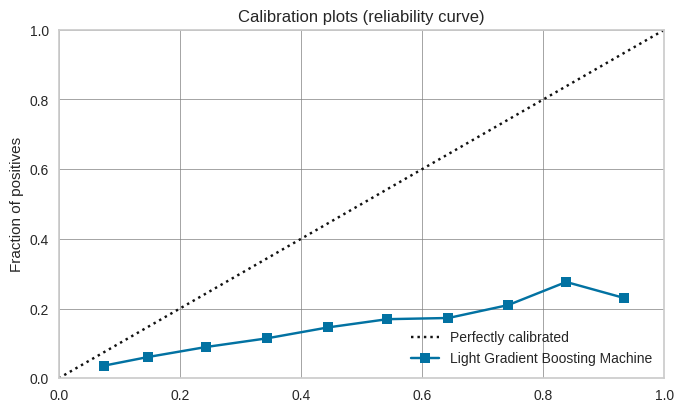

In [ ]:
plot_model(lightgbm, plot='calibration')

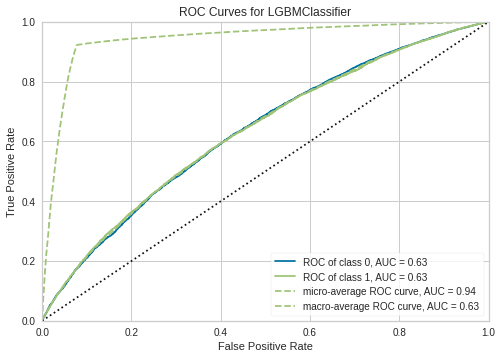

In [ ]:
plot_model(lightgbm, plot='auc')

In [ ]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463913 sha256=09b32b596f5bee255e9b60dfe9263d2a34e95af21f7564fdfceaaa6f406d5f7d
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


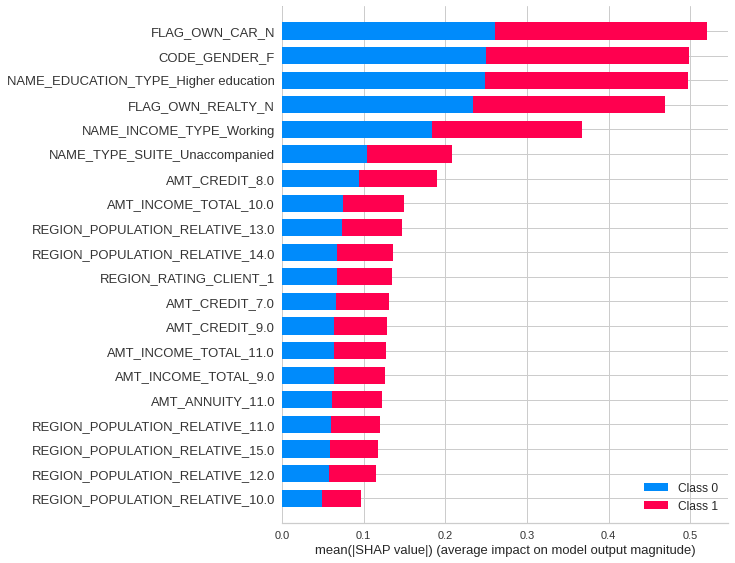

In [ ]:
# Analyse predictions generated from model
interpret_model(lightgbm)

In [ ]:
predict_model(lightgbm)

Model  Accuracy   AUC  ...    F1  Kappa   MCC
0  Light Gradient Boosting Machine     0.922 0.634  ... 0.000  0.000 0.000

[1 rows x 8 columns]

NAME_FAMILY_STATUS_Civil marriage  REGION_RATING_CLIENT_1  ...  Label  Score
0                                  0.000                   0.000  ...      0  0.848
1                                  0.000                   0.000  ...      0  0.758
2                                  0.000                   1.000  ...      0  0.954
3                                  0.000                   0.000  ...      0  0.918
4                                  0.000                   1.000  ...      0  0.964
...                                  ...                     ...  ...    ...    ...
79669                              0.000                   0.000  ...      0  0.910
79670                              0.000                   0.000  ...      0  0.860
79671                              0.000                   0.000  ...      0  0.919
79672                              0.000                   0.000  ...      0  0.847
79673                              0.000                   0.000  ...      0  0.897

[79674 rows x 74 columns]

In [ ]:
# Final model for prediction
final_lightgbm = finalize_model(lightgbm)